In [105]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (9,6) 
plt.rcParams["font.family"] = "sans-serif"

from matplotlib.pyplot import figure
import matplotlib.cm as cm

figure(figsize=(10, 8), dpi=80)

plt.style.use('ggplot')
cmap = cm.get_cmap('Blues')

import numpy as np

<Figure size 800x640 with 0 Axes>

## Epoch Savings

#### Load Data

In [99]:
# single gpu

# stopping
gpu1_1e14_stopping = pd.read_csv('./icpp_training_results/1gpu/stopping/1gpu_1e14_stopping_training_data.csv')
gpu1_1e15_stopping = pd.read_csv('./icpp_training_results/1gpu/stopping/1gpu_1e15_stopping_training_data.csv')
gpu1_1e16_stopping = pd.read_csv('./icpp_training_results/1gpu/stopping/1gpu_1e16_stopping_training_data.csv')

# no stopping
gpu1_1e14 = pd.read_csv('./icpp_training_results/1gpu/no_stopping/1gpu_1e14_training_data.csv')
gpu1_1e15 = pd.read_csv('./icpp_training_results/1gpu/no_stopping/1gpu_1e15_training_data.csv')
gpu1_1e16 = pd.read_csv('./icpp_training_results/1gpu/no_stopping/1gpu_1e16_training_data.csv')

# four gpu

# stopping
gpu4_1e14_stopping = pd.read_csv('./icpp_training_results/4gpu/stopping/4gpu_1e14_stopping_training_data.csv')
gpu4_1e15_stopping = pd.read_csv('./icpp_training_results/4gpu/stopping/4gpu_1e15_stopping_training_data.csv')
gpu4_1e16_stopping = pd.read_csv('./icpp_training_results/4gpu/stopping/4gpu_1e16_stopping_training_data.csv')

# no stopping
gpu4_1e14 = pd.read_csv('./icpp_training_results/4gpu/no_stopping/4gpu_1e14_training_data.csv')
gpu4_1e15 = pd.read_csv('./icpp_training_results/4gpu/no_stopping/4gpu_1e15_training_data.csv')
gpu4_1e16 = pd.read_csv('./icpp_training_results/4gpu/no_stopping/4gpu_1e16_training_data.csv')


For epoch savings, the number of GPUs should be (?) irrelevant, so we just use the different GPUs as repeated tests. It doesn't seem to be irrelevant, though. We should look into that. Is it just random? Should do more tests to find out.

In [100]:
import math
num_epochs_without_stopping = len(gpu1_1e14.index)

num_epochs_with_stopping_1e14 = [len(gpu1_1e14_stopping.index), len(gpu4_1e14_stopping.index)]
num_epochs_with_stopping_1e15 = [len(gpu1_1e15_stopping.index), len(gpu4_1e15_stopping.index)]
num_epochs_with_stopping_1e16 = [len(gpu1_1e16_stopping.index), len(gpu4_1e16_stopping.index)]

avg_epochs_completed_1e14 = sum(num_epochs_with_stopping_1e14)/len(num_epochs_with_stopping_1e14)
avg_epochs_completed_1e15 = sum(num_epochs_with_stopping_1e15)/len(num_epochs_with_stopping_1e15)
avg_epochs_completed_1e16 = sum(num_epochs_with_stopping_1e16)/len(num_epochs_with_stopping_1e16)

print("Avg. epochs completed for 1e14:", avg_epochs_completed_1e14)
print("Avg. epochs completed for 1e15:", avg_epochs_completed_1e15)
print("Avg. epochs completed for 1e16:", avg_epochs_completed_1e16)

percent_epochs_saved_1e14 = 1-(avg_epochs_completed_1e14/num_epochs_without_stopping)
percent_epochs_saved_1e15 = 1-(avg_epochs_completed_1e15/num_epochs_without_stopping)
percent_epochs_saved_1e16 = 1-(avg_epochs_completed_1e16/num_epochs_without_stopping)

print("Avg. percent epochs saved for 1e14:", percent_epochs_saved_1e14*100)
print("Avg. percent epochs saved for 1e15:", percent_epochs_saved_1e15*100)
print("Avg. percent epochs saved for 1e16:", percent_epochs_saved_1e16*100)



Avg. epochs completed for 1e14: 2134.0
Avg. epochs completed for 1e15: 1573.0
Avg. epochs completed for 1e16: 1688.0
Avg. percent epochs saved for 1e14: 14.639999999999997
Avg. percent epochs saved for 1e15: 37.08
Avg. percent epochs saved for 1e16: 32.48


[[0.57960784 0.77019608 0.87372549 1.        ]
 [0.23192618 0.54565167 0.76261438 1.        ]
 [0.03137255 0.28973472 0.57031911 1.        ]]
Baseline (2500, 2500, 2500)
1GPU (2167, 1647, 1737)
4GPU (2101, 1499, 1639)


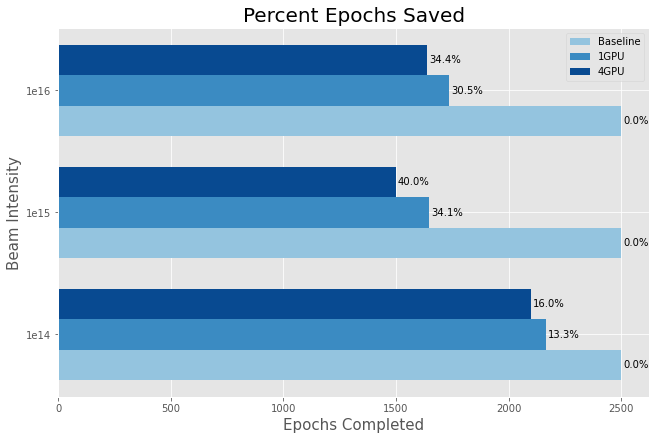

In [108]:



width = 0.2
multiplier = 0

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

beam_intensity = ("1e14", "1e15", "1e16")
epochs_run = {
    'Baseline': (num_epochs_without_stopping, num_epochs_without_stopping, num_epochs_without_stopping),
    '1GPU': (len(gpu1_1e14_stopping.index), len(gpu1_1e15_stopping.index), len(gpu1_1e16_stopping.index)),
    '4GPU': (len(gpu4_1e14_stopping.index), len(gpu4_1e15_stopping.index), len(gpu4_1e16_stopping.index)),
}

x = np.arange(len(beam_intensity))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
colors = cmap(np.linspace(0.4, 0.9, 3))
print(colors)

for index, (label, num_epochs) in enumerate(epochs_run.items()):
    print(label, num_epochs)
    offset = width * multiplier
    rects = ax.barh(x + offset, num_epochs, width, label=label, color=colors[index]) #, color= cmap(np.linspace(0, 1, 3))
    labels = [str(round((1-(num_epochs[i]/num_epochs_without_stopping))*100, 1))+'%' for i in range(len(num_epochs))]
    ax.bar_label(rects, labels=labels ,padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Epochs Completed', fontsize=15)
ax.set_ylabel('Beam Intensity', fontsize=15)

ax.set_title('Percent Epochs Saved', fontsize=20)
ax.set_yticks(x + width, beam_intensity)
ax.legend(loc='upper right')
# ax.set_ylim(0, 2500)

plt.show()
